In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd


In [3]:
dataset_train = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dl/Google_Stock_Price_Train.csv")
training_set = dataset_train.iloc[:,1:2].values

In [4]:
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range=(0,1))
training_set_scaled = sc.fit_transform(training_set)

In [7]:
x_train = []
y_train = []
for i in range(60,1258): #60 timesteps but 1 output only
  x_train.append(training_set_scaled[i-60:i,0])
  y_train.append(training_set_scaled[i,0])

x_train,y_train = np.array(x_train),np.array(y_train)

#reshape
x_train = np.reshape(x_train,(x_train.shape[0],x_train.shape[1],1))

In [8]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers import Dropout

In [9]:
#initializer
regressor = Sequential()
# Layer 1 with regularization
regressor.add(LSTM(units=50,return_sequences=True,input_shape=(x_train.shape[1],1)))
regressor.add(Dropout(0.2))
# Layer 2 with regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# Layer 3 with regularization
regressor.add(LSTM(units=50,return_sequences=True))
regressor.add(Dropout(0.2))
# Layer 4 with regularization
regressor.add(LSTM(units=50))
regressor.add(Dropout(0.2))

In [11]:
regressor.add(Dense(units=1)) #Output Layer

In [13]:
regressor.compile(optimizer="adam",loss="mean_squared_error")

In [30]:
regressor.fit(x_train,y_train,epochs=10,batch_size=32)

Epoch 1/10
38/38 [==============================] - 6s 149ms/step - loss: 0.0012
Epoch 2/10
38/38 [==============================] - 4s 101ms/step - loss: 0.0012
Epoch 3/10
38/38 [==============================] - 4s 101ms/step - loss: 0.0011
Epoch 4/10
38/38 [==============================] - 5s 143ms/step - loss: 0.0011
Epoch 5/10
38/38 [==============================] - 4s 101ms/step - loss: 9.6567e-04
Epoch 6/10
38/38 [==============================] - 4s 102ms/step - loss: 0.0011
Epoch 7/10
38/38 [==============================] - 5s 127ms/step - loss: 0.0010
Epoch 8/10
38/38 [==============================] - 4s 112ms/step - loss: 9.8202e-04
Epoch 9/10
38/38 [==============================] - 4s 100ms/step - loss: 0.0010
Epoch 10/10
38/38 [==============================] - 5s 122ms/step - loss: 0.0010


In [31]:
dataset_test = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/dl/Google_Stock_Price_Test.csv")
real_stock_price = dataset_test.iloc[:,1:2].values

In [32]:
dataset_total = pd.concat((dataset_train['Open'],dataset_test['Open']),axis=0)
inputs = dataset_total[len(dataset_total)-len(dataset_test)-60:].values
inputs = inputs.reshape(-1,1)
inputs = sc.transform(inputs)
x_test=[]
for i in range(60,80):
  x_test.append(inputs[i-60:i,0])
x_test = np.array(x_test)
x_test = np.reshape(x_test,(x_test.shape[0],x_test.shape[1],1))
predicted_price = regressor.predict(x_test)
predicted_price = sc.inverse_transform(predicted_price)

1/1 [==============================] - 0s 40ms/step


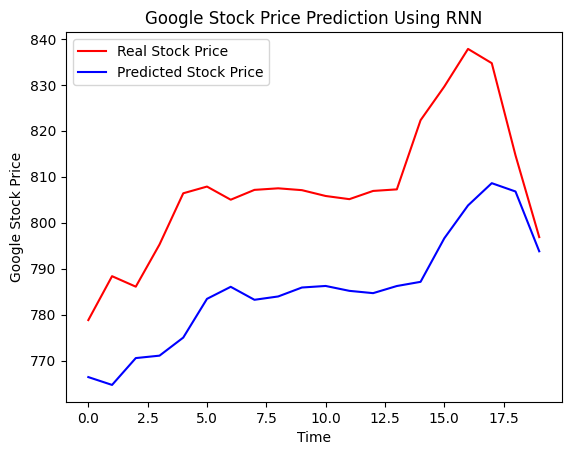

In [34]:
plt.plot(real_stock_price,color = 'red',label = 'Real Stock Price')
plt.plot(predicted_price,color = 'blue',label = 'Predicted Stock Price')
plt.title('Google Stock Price Prediction Using RNN')
plt.xlabel('Time')
plt.ylabel('Google Stock Price')
plt.legend()
plt.show()
# if you increase the number of epoch the output will get effected